Best Algorithm: Spectral
Silhouette Score: 0.4593010216876192
Adjusted Rand Index: 0.6464871114465449


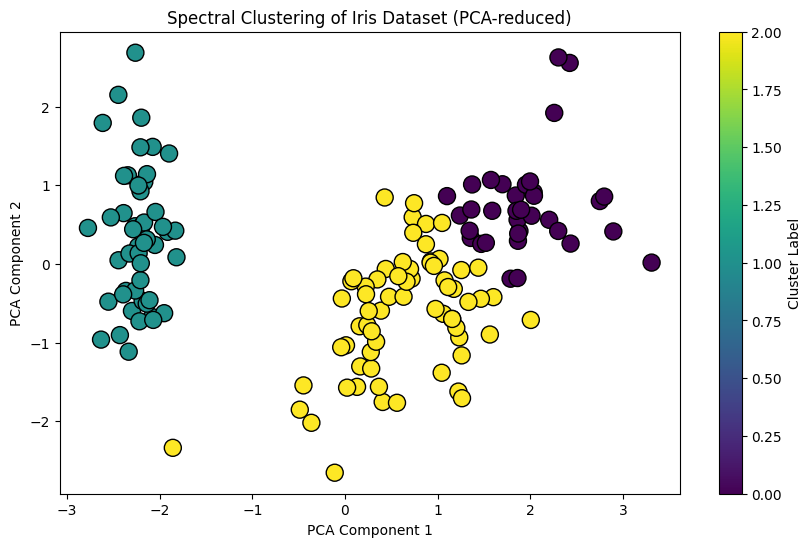

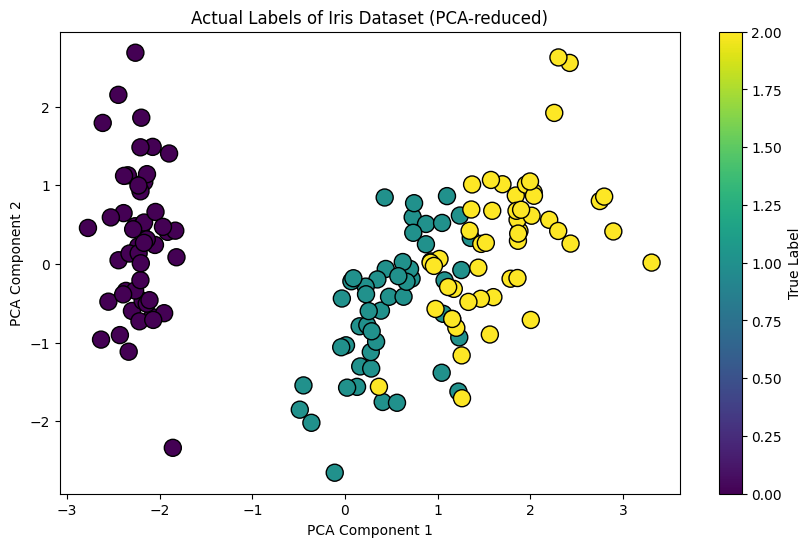

In [207]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, SpectralClustering, MeanShift, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, adjusted_rand_score
import matplotlib.pyplot as plt
import numpy as np

# 데이터 로드 및 전처리
iris = load_iris()
X = iris.data
y = iris.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 클러스터링 알고리즘 리스트
algorithms = {
    "KMeans": KMeans(n_clusters=3, random_state=42),
    "Agglomerative (Ward)": AgglomerativeClustering(n_clusters=3, linkage='ward'),
    "Spectral": SpectralClustering(n_clusters=3, random_state=42, affinity='nearest_neighbors'),
    "Gaussian Mixture": GaussianMixture(n_components=3, random_state=42),
    "Mean Shift": MeanShift(),
    "DBSCAN": DBSCAN()
}

results = {}

# 알고리즘 적용 및 평가
for name, algorithm in algorithms.items():
    if name == "Gaussian Mixture":
        clusters = algorithm.fit_predict(X_scaled)
    else:
        clusters = algorithm.fit_predict(X_scaled)
        
    # 성능 평가
    silhouette = silhouette_score(X_scaled, clusters)
    ari = adjusted_rand_score(y, clusters)
    
    # 결과 저장
    results[name] = {
        "clusters": clusters,
        "silhouette": silhouette,
        "ari": ari
    }

# 가장 높은 ARI를 가진 알고리즘 찾기
best_algorithm = max(results, key=lambda x: results[x]["ari"])

print(f"Best Algorithm: {best_algorithm}")
print(f"Silhouette Score: {results[best_algorithm]['silhouette']}")
print(f"Adjusted Rand Index: {results[best_algorithm]['ari']}")

# PCA 적용
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 클러스터링 결과 시각화 (Best Algorithm)
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=results[best_algorithm]['clusters'], cmap='viridis', edgecolor='k', s=150)
plt.title(f'{best_algorithm} Clustering of Iris Dataset (PCA-reduced)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster Label')
plt.show()

# 실제 라벨과 비교한 시각화
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=150)
plt.title('Actual Labels of Iris Dataset (PCA-reduced)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='True Label')
plt.show()


In [208]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('./Mall_Customers.csv')
df_cluster = df.iloc[:, 2:]
df_cluster.head() 


,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


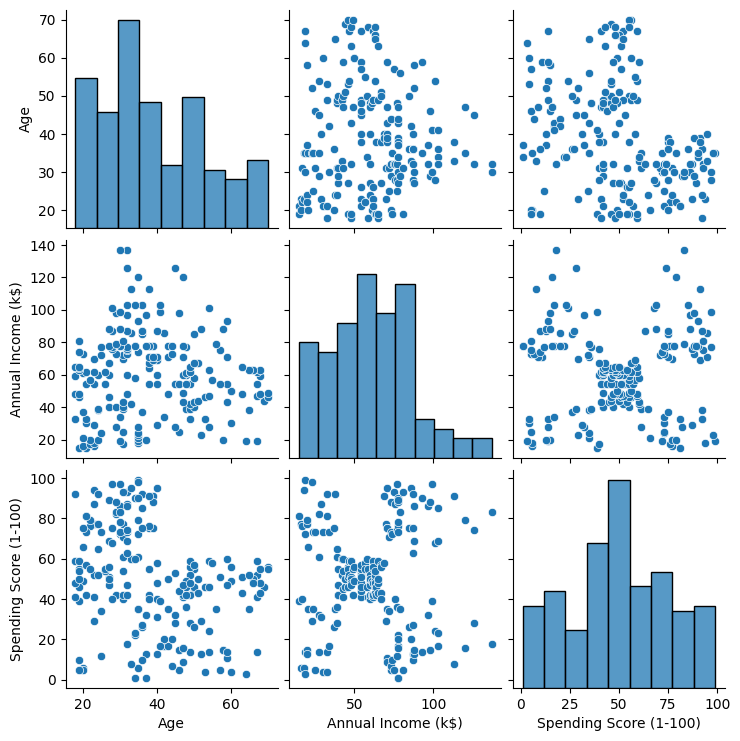

In [209]:
sns.pairplot(df[['Age', 'Annual Income (k$)','Spending Score (1-100)']])

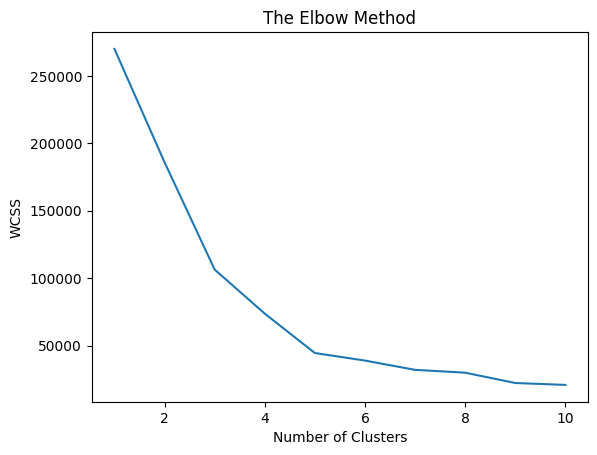

In [210]:
data=df.iloc[:,[3,4]].values
from sklearn.cluster import KMeans
wcss=[] # within cluster sum of square
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++',random_state=0)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_) #inertia_ = to find the wcss value

plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

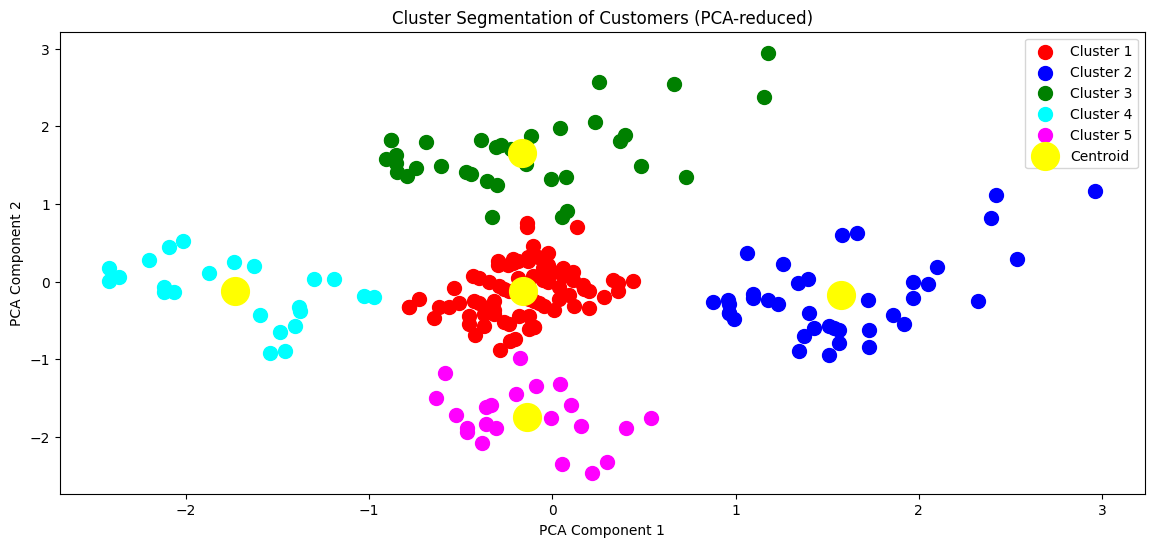

In [211]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# 필요한 열 선택
data = df.iloc[:, [3, 4]].values

# 데이터 표준화
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# PCA를 사용하여 2차원으로 특징 감소
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

# KMeans 클러스터링 적용
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)
y_kmeans = kmeans.fit_predict(data_pca)

# 클러스터링 결과 시각화 (PCA 적용 후)
fig, ax = plt.subplots(figsize=(14, 6))
ax.scatter(data_pca[y_kmeans == 0, 0], data_pca[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1')
ax.scatter(data_pca[y_kmeans == 1, 0], data_pca[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')
ax.scatter(data_pca[y_kmeans == 2, 0], data_pca[y_kmeans == 2, 1], s=100, c='green', label='Cluster 3')
ax.scatter(data_pca[y_kmeans == 3, 0], data_pca[y_kmeans == 3, 1], s=100, c='cyan', label='Cluster 4')
ax.scatter(data_pca[y_kmeans == 4, 0], data_pca[y_kmeans == 4, 1], s=100, c='magenta', label='Cluster 5')
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=400, c='yellow', label='Centroid')

plt.title('Cluster Segmentation of Customers (PCA-reduced)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()


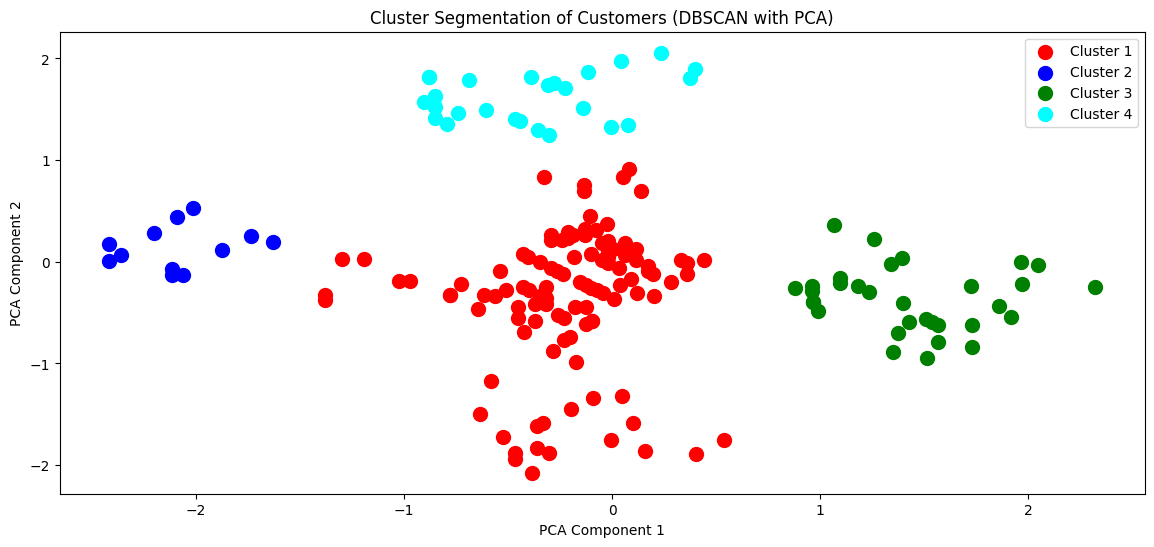

In [212]:
# PCA를 사용하여 2차원으로 특징 감소
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

# DBSCAN 클러스터링 적용
dbscan = DBSCAN(eps=0.5, min_samples=10)
y_dbscan = dbscan.fit_predict(data_pca)

# 클러스터링 결과 시각화 (PCA 적용 후)
fig, ax = plt.subplots(figsize=(14, 6))
ax.scatter(data_pca[y_dbscan == 0, 0], data_pca[y_dbscan == 0, 1], s=100, c='red', label='Cluster 1')
ax.scatter(data_pca[y_dbscan == 1, 0], data_pca[y_dbscan == 1, 1], s=100, c='blue', label='Cluster 2')
ax.scatter(data_pca[y_dbscan == 2, 0], data_pca[y_dbscan == 2, 1], s=100, c='green', label='Cluster 3')
ax.scatter(data_pca[y_dbscan == 3, 0], data_pca[y_dbscan == 3, 1], s=100, c='cyan', label='Cluster 4')

plt.title('Cluster Segmentation of Customers (DBSCAN with PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()


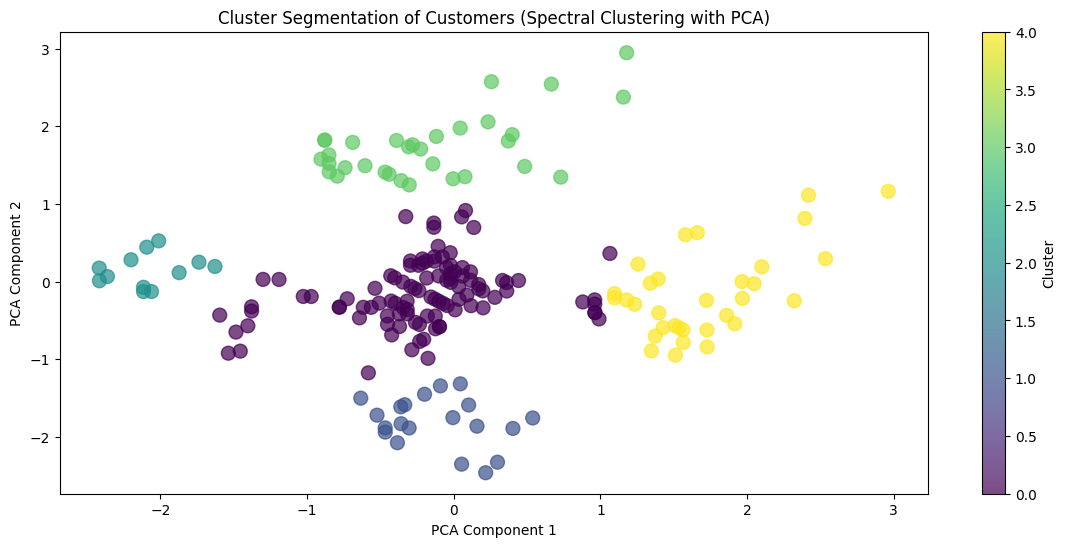

In [213]:
from sklearn.decomposition import PCA
from sklearn.cluster import SpectralClustering
import matplotlib.pyplot as plt

# PCA를 사용하여 2차원으로 특징 감소
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

# Spectral Clustering 적용
spectral_clustering = SpectralClustering(n_clusters=5, random_state=0)
y_spectral = spectral_clustering.fit_predict(data_pca)

# 클러스터링 결과 시각화
plt.figure(figsize=(14, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=y_spectral, cmap='viridis', s=100, alpha=0.7)
plt.title('Cluster Segmentation of Customers (Spectral Clustering with PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()


In [214]:
import pandas as pd
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.feature_selection import SelectKBest, chi2
import numpy as np

file_path = './mushrooms.csv'
data = pd.read_csv(file_path)


label_encoder = LabelEncoder()
for column in data.columns:
    data[column] = label_encoder.fit_transform(data[column])


X = data.drop('class', axis=1)
y = data['class']


selector = SelectKBest(chi2, k=5)
X_new = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support(indices=True)]

classifiers = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'GaussianNB': GaussianNB(),
    'SVM': SVC(random_state=42),
    'KNN': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42)
}


scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='weighted'),
    'recall': make_scorer(recall_score, average='weighted'),
    'f1': make_scorer(f1_score, average='weighted')
}


results = {}
for name, clf in classifiers.items():
    cv_results = cross_validate(clf, X_new, y, cv=5, scoring=scoring)
    results[name] = cv_results


mean_scores = {}
for name, cv_results in results.items():
    mean_scores[name] = {
        'accuracy': np.mean(cv_results['test_accuracy']),
        'precision': np.mean(cv_results['test_precision']),
        'recall': np.mean(cv_results['test_recall']),
        'f1': np.mean(cv_results['test_f1'])
    }


best_model = max(mean_scores, key=lambda x: mean_scores[x]['f1'])


for name, scores in mean_scores.items():
    print(f"\n{name}")
    print(f"Selected Features (Top 5): {selected_features}")
    print(f"Mean accuracy: {scores['accuracy']:.2f}")
    print(f"Mean precision: {scores['precision']:.2f}")
    print(f"Mean recall: {scores['recall']:.2f}")
    print(f"Mean f1-score: {scores['f1']:.2f}")

print(f"\nThe best model is: {best_model} with a mean f1-score of {mean_scores[best_model]['f1']:.2f}")



Decision Tree
Selected Features (Top 5): Index(['bruises', 'gill-size', 'gill-color', 'stalk-root', 'ring-type'], dtype='object')
Mean accuracy: 0.93
Mean precision: 0.94
Mean recall: 0.93
Mean f1-score: 0.92

GaussianNB
Selected Features (Top 5): Index(['bruises', 'gill-size', 'gill-color', 'stalk-root', 'ring-type'], dtype='object')
Mean accuracy: 0.76
Mean precision: 0.79
Mean recall: 0.76
Mean f1-score: 0.75

SVM
Selected Features (Top 5): Index(['bruises', 'gill-size', 'gill-color', 'stalk-root', 'ring-type'], dtype='object')
Mean accuracy: 0.80
Mean precision: 0.84
Mean recall: 0.80
Mean f1-score: 0.78

KNN
Selected Features (Top 5): Index(['bruises', 'gill-size', 'gill-color', 'stalk-root', 'ring-type'], dtype='object')
Mean accuracy: 0.87
Mean precision: 0.90
Mean recall: 0.87
Mean f1-score: 0.86

Logistic Regression
Selected Features (Top 5): Index(['bruises', 'gill-size', 'gill-color', 'stalk-root', 'ring-type'], dtype='object')
Mean accuracy: 0.74
Mean precision: 0.77
Mean 